# Sales Analysis Tutorial

- Reference: https://www.youtube.com/watch?v=eMOA1pPVUc4

### Import libraries for sales analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

### Merge all csv files into a single dataframe

In [2]:
# path = './Sales_Data/'
# files = [file for file in os.listdir(path) if os.path.isfile(os.path.join(path, file))]

# df = pd.DataFrame()
# for file in files: 
#     month_df = pd.read_csv('./Sales_Data/' + file)
#     df = pd.concat([df, month_df])

# df.to_csv('Sales_Year_2019.csv', index=False)  

### Read sales data and drop rows that contain any NaN values

In [3]:
df = pd.read_csv('Sales_Year_2019.csv', index_col=False)
df.dropna(axis=0, how='any', inplace=True) # Drop any NaN values

### Figure out what was the best month for sales?

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
# Add 'Month' column

df = df[df['Order Date'].str[0:2] != 'Or'] # Remove rows that contains unnecessary string
df['Month'] = df['Order Date'].str[0:2].astype('int8')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [6]:
# Add 'Sales' column

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) # Covert to int
df['Price Each'] = pd.to_numeric(df['Price Each']) # Covert to float
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df = df.reindex(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Month', 'Purchase Address'], axis=1) # Change the order of columns
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


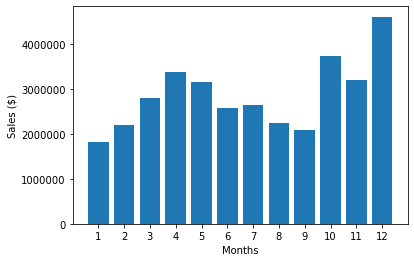

In [7]:
sales_month_result = df.groupby('Month').sum()['Sales']
months = range(1, 13)

plt.bar(months, sales_month_result)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.ticklabel_format(style='plain') # Disable scientific notation on the y-axis
plt.show()

### What city had the highest number of sales?

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


In [9]:
# df['City'] = df['Purchase Address'].str.split(',').str[1]
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


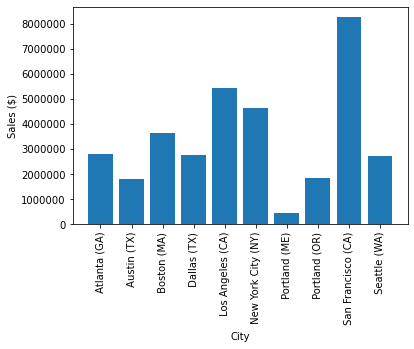

In [10]:
sales_city_result = df.groupby('City').sum()['Sales']

# cities = sorted(df['City'].unique())
cities = [city for city, df in df.groupby('City')]

plt.bar(cities, sales_city_result)
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

### What should we display advertisements to maximize likelihood of customer's buying product?

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


In [12]:
# Use pd.to_datetime()

# Convert string object 'Order Date' to datetime object
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


In [13]:
# Add 'Hour' column

df['Hour'] = df['Order Date'].dt.hour
df = df.reindex(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Hour', 'Month', 'Purchase Address', 'City'], axis=1) # Change the order of columns
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


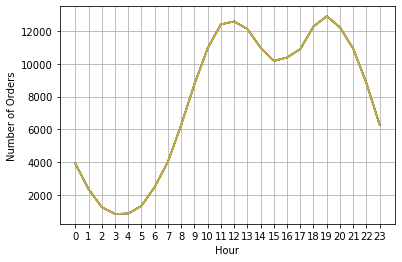

In [14]:
hours = [hour for hour, df in df.groupby('Hour')]
orders = df.groupby('Hour').count()

plt.plot(hours, orders)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# A plot shows that customers are purchasing their products mostly at 12 P.M and 7 P.M. 
# So by that result, we should display advertisements at around 12 P.M and 7 P.M to maximize sales (effective to raise customer's consumption).

### What products are most often sold together? (2-pair)

In [15]:
# Find duplicated (identical) values in the column 'Order ID'

orders = df[df.duplicated(subset=['Order ID'], keep=False)]
orders.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,19,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA)
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,19,4,"20 Hill St, Los Angeles, CA 90001",Los Angeles (CA)
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,11,4,"823 Highland St, Boston, MA 02215",Boston (MA)


In [16]:
orders = orders.groupby(['Order ID'])['Product'].apply(','.join).reset_index()
orders.head()

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"


In [17]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in orders['Product']:
    products = row.split(',')
    count.update(Counter(combinations(products, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most?

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


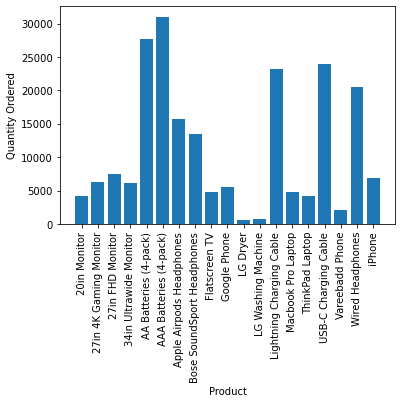

In [19]:
quantities = df.groupby(['Product']).sum()['Quantity Ordered']
products = [product for product, df in df.groupby(['Product'])]

plt.bar(products, quantities)
plt.xticks(rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

C:\Users\JIHUN~1\AppData\Local\Temp/ipykernel_6616/2831964526.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


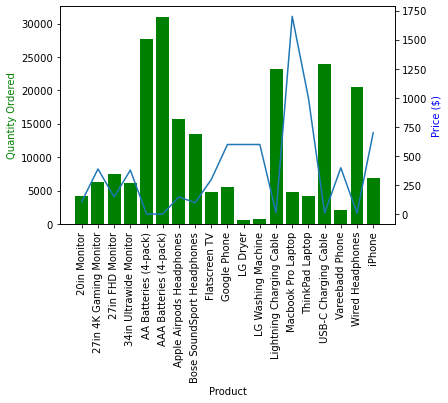

In [20]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantities, color='g')
ax2.plot(products, prices)

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical')

plt.show()